### Цели

1) Получить равновесные плотности жидкой и газовой фазы и поверхностного
натяжения при помощи двухфазного моделирования для одной из температур при разных
радиусах обрезания потенциала.
2) Полученные зависимости экстраполировать для бесконечных радиусов обрезки. Сравнить с табличными значениями.
3) Получить кривую
равновесия(зависимости давления от плотности для газовой и для жидкой фаз).
4) Аппроксимировав полученные кривые формулами из приложенной статьи, получить
критические температуру и давление и сравнить с табличными значениями.

# 1

Проведём двухфазное моделирование для температуры 102K, 100.000 шагов и параметров Леннарда-Джонса равных единице, далее пересчитаем для аргона.

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import scipy

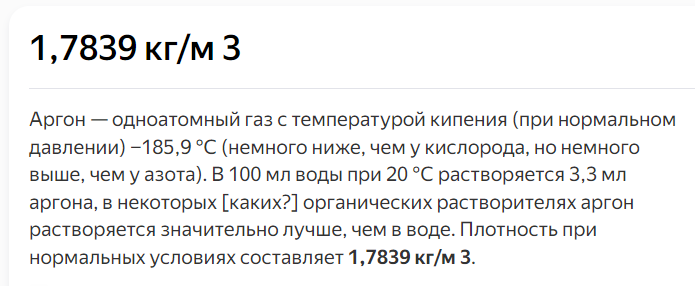

In [16]:
# Ar
k_b = 8.62 * 1e-5   #eV/K
mass = 39.948  #а.е.м.
epsilon = 120 * k_b #eV
sigma = 3.4 #A
T = 0.85 * epsilon / k_b
Lx = 300 * (sigma*10**-10)
rho_gas_theor = 0.019495
rho_liq_theor = 1.3001


In [3]:
os.listdir('stage1/')

['2.5.txt',
 '2.txt',
 '3.5.txt',
 '3.txt',
 '4.5.txt',
 '4.txt',
 '5.5.txt',
 '5.txt',
 '6.5.txt',
 '6.txt',
 '7.5.txt',
 '7.txt',
 '8.txt']

Воспользовавшись 'awk -f profile-average.awk -v ncol=4 0.85.densitx.txt >> profile_out.txt', получим файлы со столбцами
Chunk и  Dens/mass

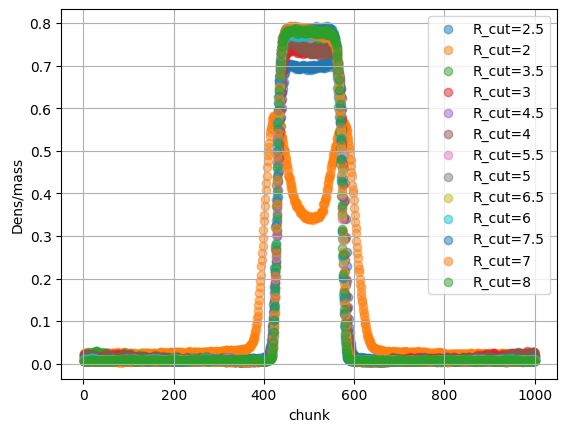

In [4]:
radius_df = pd.DataFrame()
for radius_cut in os.listdir('stage1/'):
    data = pd.read_csv(f"stage1/{radius_cut}", sep =" ", names=["Ncount",  "Dens/mass"], index_col=0)
    plt.scatter(data.index, data['Dens/mass'], alpha=0.5, label=f"R_cut={radius_cut[:-4]}")
    
    density_gas = data[((data.index < 400) | (data.index > 600))]["Dens/mass"].mean()
    density_liq = data[((data.index > 400) & (data.index < 600))]["Dens/mass"].mean()

    rho_gas = density_gas * mass / (sigma)**3
    eps_gas = np.abs(rho_gas - rho_gas_theor) / rho_gas_theor * 100

    rho_liq = density_liq * mass / (sigma)**3
    eps_liq = np.abs(rho_liq - rho_liq_theor) / rho_liq_theor * 100
    
    radius_df.loc[radius_cut[:-4], "density_gas"] = rho_gas
    radius_df.loc[radius_cut[:-4], "density_gas_theor"] = rho_gas_theor    
    radius_df.loc[radius_cut[:-4], "eps_gas"] = eps_gas    
    radius_df.loc[radius_cut[:-4], "density_liq"] = rho_liq    
    radius_df.loc[radius_cut[:-4], "density_liq_theor"] = rho_liq_theor 
    radius_df.loc[radius_cut[:-4], "eps_liq"] = eps_liq 
    
    pressure = pd.read_csv(f"calcs/{radius_cut[:-4]}/pressure.txt", sep =" ", names=["pxx", "pyy", "pzz"], index_col=0, skiprows=[0])
    surf_tension = (pressure['pxx'].mean() - (pressure['pyy'].mean() + pressure['pzz'].mean())) \
                * (epsilon * 1.6 * 10**(-19)) / (sigma/10 * 10**(-9))**3 / 2 * Lx / 2
    surf_tension_theor = 0.0090131
    eps_surf_tension = np.abs(surf_tension - surf_tension_theor) / surf_tension_theor * 100
    
    radius_df.loc[radius_cut[:-4], "surf_tension"] = surf_tension    
    radius_df.loc[radius_cut[:-4], "surf_tension_theor"] = surf_tension_theor 
    radius_df.loc[radius_cut[:-4], "eps_surf_tension"] = eps_surf_tension 
    radius_df.index = radius_df.index.astype(float)

plt.grid()
plt.xlabel('chunk')
plt.ylabel('Dens/mass')
plt.legend()
plt.show()

## Посмотрим на значения плотности фаз

In [5]:
radius_df.drop(['surf_tension', 'surf_tension_theor', 'eps_surf_tension'], axis=1)

,density_gas,density_gas_theor,eps_gas,density_liq,density_liq_theor,eps_liq
2.5,0.014935,0.019495,23.392048,0.542669,1.3001,58.259448
2.0,0.036242,0.019495,85.905304,0.453701,1.3001,65.102617
3.5,0.011391,0.019495,41.571693,0.557006,1.3001,57.156675
3.0,0.012339,0.019495,36.707438,0.553186,1.3001,57.450535
4.5,0.007748,0.019495,60.257264,0.571608,1.3001,56.033519
4.0,0.010847,0.019495,44.360059,0.559190,1.3001,56.988718
5.5,0.007870,0.019495,59.628765,0.571122,1.3001,56.070884
5.0,0.008815,0.019495,54.783329,0.567334,1.3001,56.362278
6.5,0.007570,0.019495,61.171324,0.572334,1.3001,55.977667
6.0,0.008491,0.019495,56.443932,0.568627,1.3001,56.262818


[]

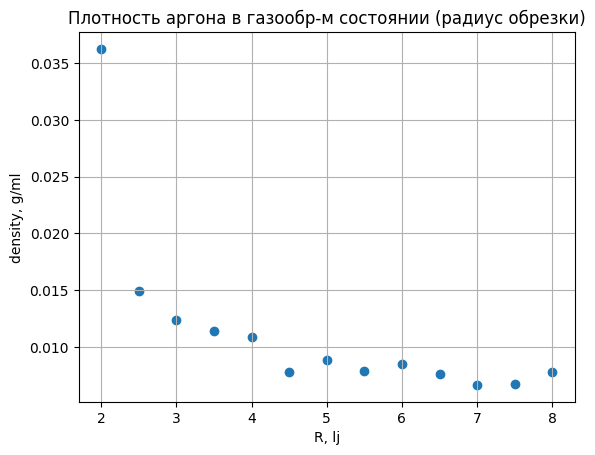

In [6]:
plt.scatter(radius_df.index, radius_df['density_gas'])
plt.xlabel('R, lj')
plt.ylabel('density, g/ml')
plt.title('Плотность аргона в газообр-м состоянии (радиус обрезки)')
plt.grid(True)
plt.plot()

[]

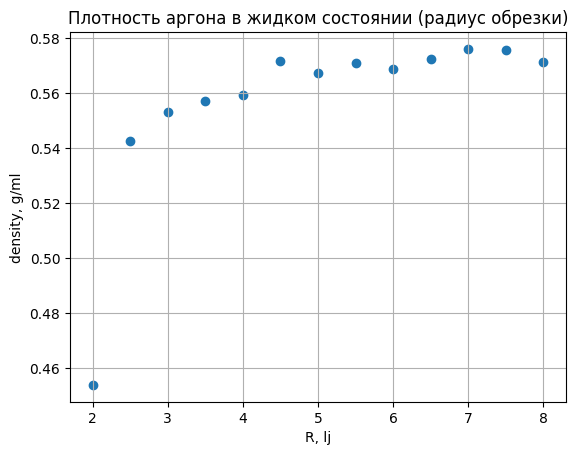

In [7]:
plt.scatter(radius_df.index, radius_df['density_liq'])
plt.xlabel('R, lj')
plt.ylabel('density, g/ml')
plt.title('Плотность аргона в жидком состоянии (радиус обрезки)')
plt.grid(True)
plt.plot()

Аппроксимируем зависимость плотности аргона в жидком состоянии от радиуса обрезки экспонентой со степенью 3/2

In [8]:
f = lambda x, a, b: a - np.exp(-(x / b)**(3/2))
fitted = scipy.optimize.curve_fit(f, radius_df.index,  radius_df['density_liq'])
a, b = fitted[0]

[]

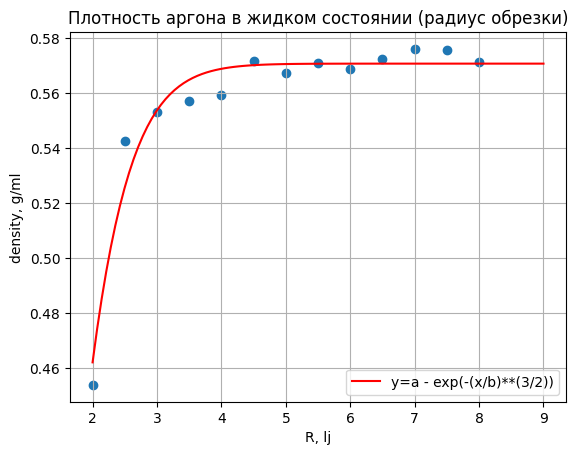

In [9]:
plt.scatter(radius_df.index, radius_df['density_liq'])
x = np.linspace(2, 9, 100)
plt.plot(x, f(x, a, b), label='y=a - exp(-(x/b)**(3/2))', c='r')

plt.xlabel('R, lj')
plt.ylabel('density, g/ml')
plt.title('Плотность аргона в жидком состоянии (радиус обрезки)')
plt.grid(True)
plt.legend()
plt.plot()

## Посмотрим на полученные значения поверхностного натяжения

In [10]:
# radius_df[['surf_tension', 'surf_tension_theor', 'eps_surf_tension']]

Аппроксимируем зависимость коэффициента поверхностного натяжения от радиуса обрезки экспонентой со степенью 3/2

In [11]:
fitted = scipy.optimize.curve_fit(f, radius_df.index,  radius_df['surf_tension'])
a, b = fitted[0]

[]

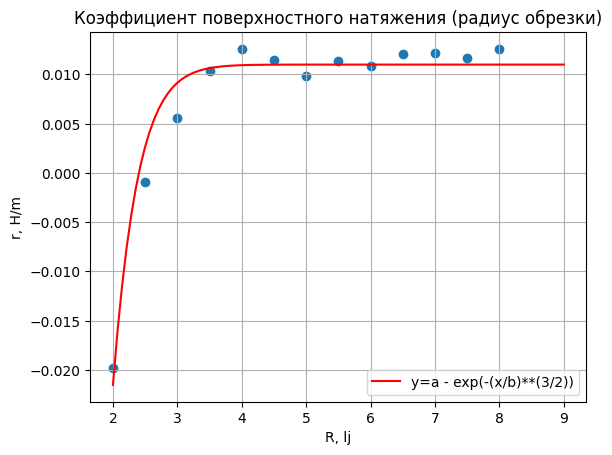

In [12]:
plt.scatter(radius_df.index, radius_df['surf_tension'])
x = np.linspace(2, 9, 100)
plt.plot(x, f(x, a, b), label='y=a - exp(-(x/b)**(3/2))', c='r')

plt.xlabel('R, lj')
plt.ylabel('r, H/m')
plt.title('Коэффициент поверхностного натяжения (радиус обрезки)')
plt.grid(True)
plt.legend()
plt.plot()

Значения сошлись с табличными лишь по порядку величины.

# 2

In [13]:
print(f"Значение для жидкости: {radius_df['density_liq'][8]} g/ml. \nЗначение для газа: {radius_df['density_gas'][8]}  g/ml.")

Значение для жидкости: 0.571496912058481 g/ml. 
Значение для газа: 0.007779095273315133  g/ml.


Далее находим точки фазового равновеси с помощью алгоритма Хойна.

Запускаем nvt для со значениями плотности газа и жидкости, из log файла production достаем значение Average pressure

для газа (p_0): 0.00624325509517011 и 
для жидкости: -0.396042723533748


Далее последуют запуски в npt ансамбле. Берется T_prod=0.85, T_base=0.85, pe = p_0 (переключаем фазы жидкость и газ). Потом происходит пересчет давления по формуле, реализованной в функции P_tmp. Вновб гонится npt, но уже с параметрами  T_prod=0.95, T_base=0.85, pe = p_tmp (тоже жидкость и газ). По формуле в P_phase получаем следующую точку на диаграмме.

Повторяем цикл npt для сдвига на шаг dT


In [2]:
dT = 0.1
P_tmp = lambda P, T, H_liq, H_gas, V_liq, V_gas: P + (H_liq - H_gas)*dT/(T*(V_liq-V_gas))
P_phase = lambda P, P_tmp, T, H_liq, H_gas, V_liq, V_gas: P + (dT/2)*((P_tmp - P)/dT + (H_liq - H_gas)/((T+dT)*(V_liq-V_gas)))

In [9]:
T_range = np.arange(0.85, 1.26, 0.1)
T_range

array([0.85, 0.95, 1.05, 1.15, 1.25])

1 точка

In [5]:
p0 = 0.00624325509517011
P_range = [p0]
p = P_tmp(p0, T_range[0], -4.2319, 2.0233, 1.96225638325657, 101.893862714303)
p

0.013607350493727837

In [6]:
p = P_phase(p0, p, T_range[0], -3.66590807558551, 2.13559879538214, 1.37466959109347, 63.5052698516049)
P_range.append(p)
p

0.014839829060294532

2 точка

In [19]:
p = P_tmp(p, T_range[1], -3.67023847745576, 2.11289141100581, 1.3747118253471, 57.7673937440554 )
p

0.0256346785666974

In [7]:
p = P_phase(0.014839829060294532, p, T_range[1], -3.05058596737138 , 2.2279008952989, 1.48988112656025, 35.4272438281046)
P_range.append(p)
p

0.02224631257171291

3 точка

In [8]:
p = P_tmp(p, T_range[2], -3.04632529026589, 2.28562476776564, 1.49191710662254, 41.7726106458377 )
p

0.034852966599087154

In [10]:
p = P_phase(0.02224631257171291, p, T_range[2], -2.33609132249165 , 2.40490104534155, 1.67520305321403, 28.302440189923)
P_range.append(p)
p

0.036290964826579244

4 точка

In [11]:
p = P_tmp(p, T_range[3], -2.33165535120664, 2.38228540522133, 1.67355811403035, 26.9498618736397 )
p

0.05250804687155451

In [12]:
p = P_phase(0.036290964826579244, p, T_range[3], 2.49239383242566 , 2.48934376220563, 19.7049680734372, 19.6408707619063)
P_range.append(p)
p

0.04630290563116811

In [18]:
P_range = np.array(P_range)

Text(0.5, 1.0, 'Кривая фазового равновесия для аргона')

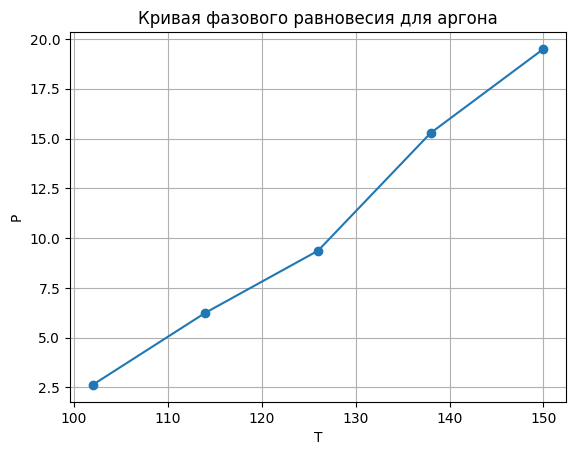

In [19]:
plt.plot(T_range*epsilon/k_b, P_range * (epsilon * 1.6 * 10**(-19)) / (sigma/10 * 10**(-9))**3 / 100000, marker='o')
plt.xlabel('T')
plt.ylabel('P')
plt.grid()
plt.title('Кривая фазового равновесия для аргона')

На последнем шаге мы получили одникаовые фазовые оъемы для жидкого и газообразного состояния (19.7049680734372, 19.6408707619063). Это означает, что мы достигли значения  критической температуры, за которой уже не будет различия между этими двумя фазами.

Действительно, фазовая диаграмма, приведенная ниже, подтверждает наличие критической точки на ф.д. при примерно Т = 150К. 

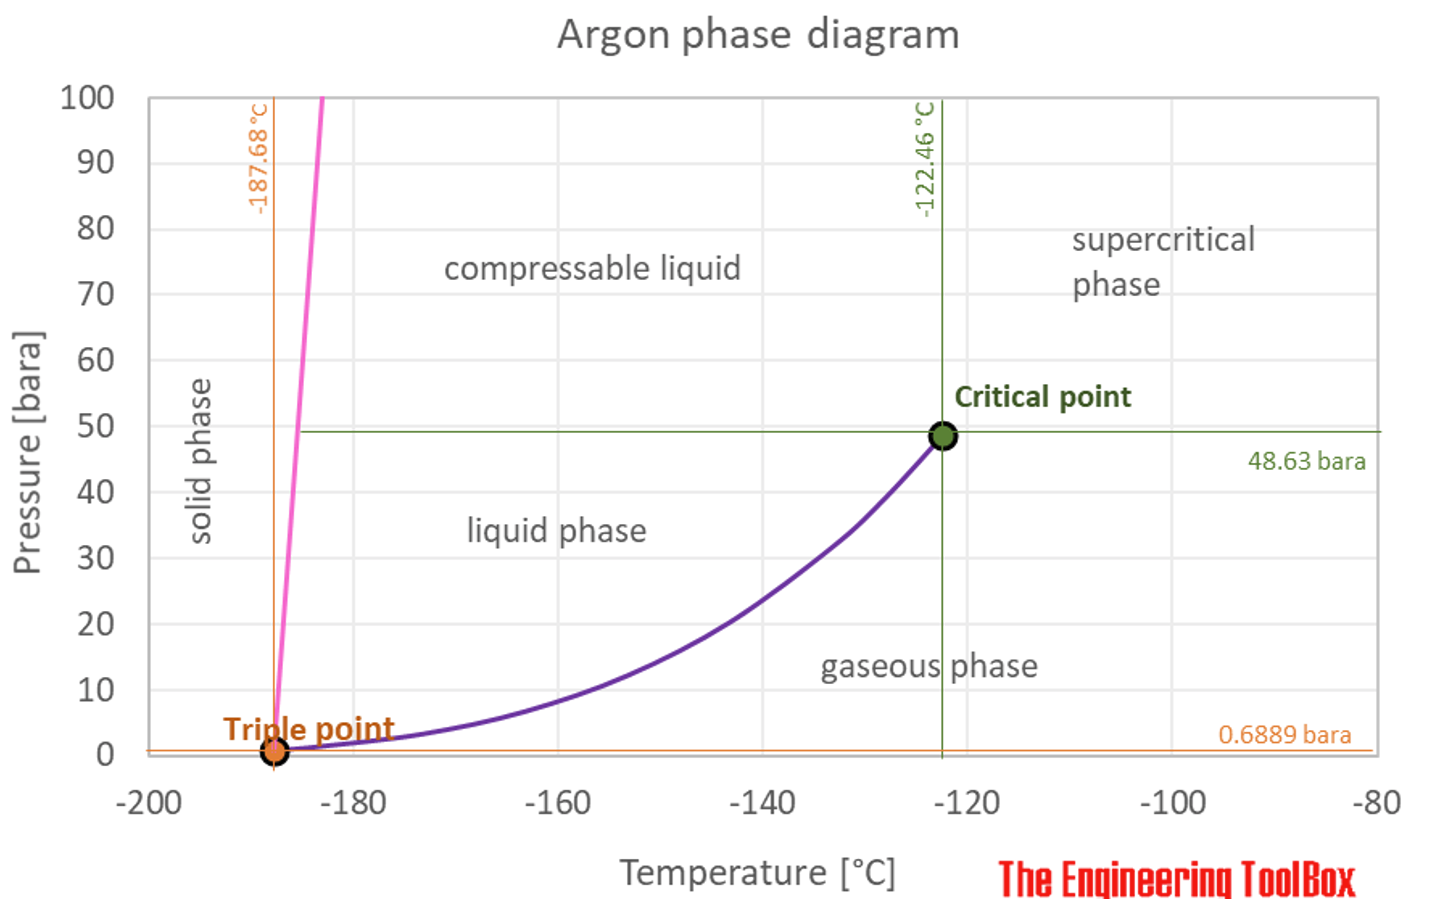

Аппроксимировав полученные кривые формулами из приложенной статьи, получить
критические температуру и давление и сравнить с табличными значениями.

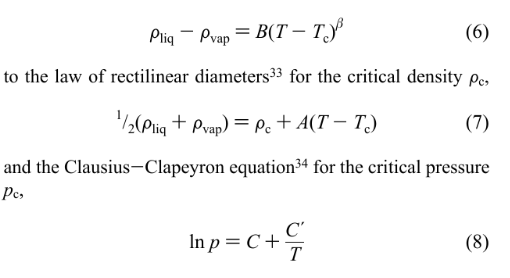

Критический показатель $\beta$ возьмем оценочно из теории Ландау

In [27]:
beta = 0.5

V_liq = np.array([101.893862714303,63.5052698516049,35.4272438281046,28.302440189923,19.6408707619063])
V_gas = np.array([1.96225638325657, 1.37466959109347,1.48988112656025, 1.67520305321403,19.7049680734372])

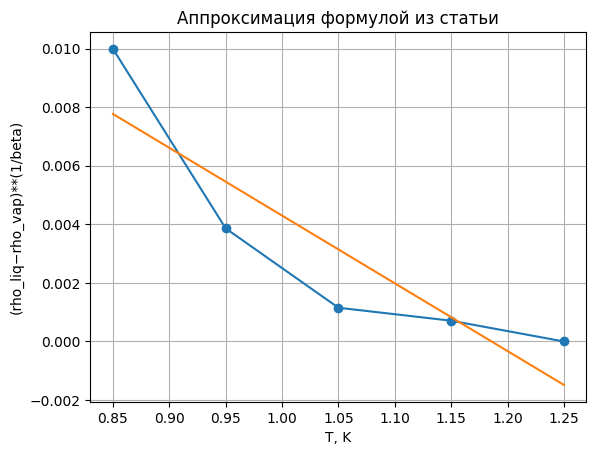

In [32]:
density = pd.DataFrame()
n_atoms = 1000
density['gas'] = V_gas / n_atoms
density['liq'] = V_liq / n_atoms

fitted = scipy.optimize.curve_fit(lambda t, t_c, B: B * (t - t_c),  
                                  T_range, (density['liq'] - density['gas'])**(1 / beta))
t_c, B = fitted[0]

y = B * (T_range - t_c)

plt.plot(T_range, (density['liq'] - density['gas'])**(1 / beta), marker='o')
plt.plot(T_range, B * (T_range - t_c))
plt.ylabel('(rho_liq−rho_vap)**(1/beta)')
plt.xlabel('T, K')
plt.title('Аппроксимация формулой из статьи')
plt.grid()
plt.show()

In [34]:
print(f'Критическая температура: T_кр = {round(t_c  * epsilon / k_b, 2)} K.')

Критическая температура: T_кр = 142.3 K.


Найдем критическое давление

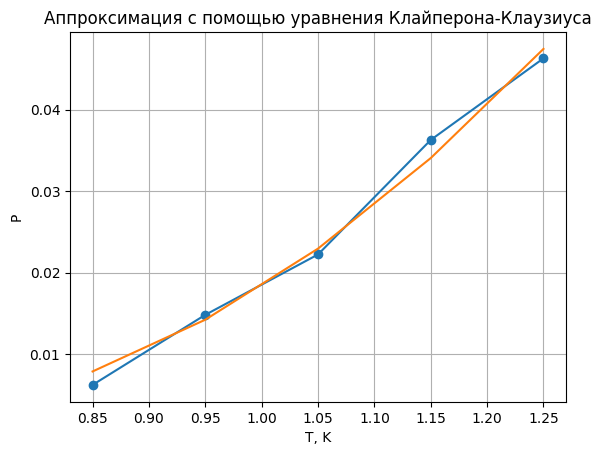

In [39]:
fitted = scipy.optimize.curve_fit(lambda t, c1, c2: np.exp(c1 + c2/t),  
                                  T_range, P_range)
c1, c2 = fitted[0]

plt.plot(T_range, P_range, 'o-')
plt.plot(T_range, np.exp(c1 + c2/T_range))

plt.ylabel('P')
plt.xlabel('T, K')
plt.title('Аппроксимация с помощью уравнения Клайперона-Клаузиуса')
plt.grid()
plt.show()

In [41]:
print(f"Критическое давление: P_c = {np.exp(c1 + c2/t_c)* (epsilon * 1.6 * 10**(-19)) / (sigma/10 * 10**(-9))**3 / 100000} бар")

Критическое давление: P_c = 16.260276504964136 бар


### Вывод

In [44]:
print(f'Критическая температура: T_кр = {round(t_c  * epsilon / k_b, 2)} K, ошибка относительно теоретического значения: {(142.3 - ( 273 - 122.46))/ (273 - 122.46)* -1}')
print(f"Критическое давление: P_c = {16.26} бар, ошибка относительно теоретического значения: {(48.63 - 16.26)/48.63}")


Критическая температура: T_кр = 142.3 K, ошибка относительно теоретического значения: 0.05473628271555738
Критическое давление: P_c = 16.26 бар, ошибка относительно теоретического значения: 0.6656384947563233


Было проведено двухфазное моделирование для аргона с использованием потенциала Леннарда-Джонса для разных радиусов обрезки. 

 По этим данным было проведено интегрирование по кривой фазового перехода.
 Далее были аппроскимированы данные, расчитаны критические температура и давление (см выше). Для критической температуры отклонение от табличного значения вышло небольшим, 5%,  для давления 67%. Ошибка скорее всего связана с большим отклонением плотности газа и жидкости от теоретического значения, которые использовались в начале построения диаграммы